In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import font_manager
import ast
import re

Открываем датасеты

In [2]:
df_vk = pd.read_csv('VK_data.csv', index_col=0) # есть пустой столбец
df_ok = pd.read_csv('OK_data.csv')

Настройка стилей

In [3]:
font_path = 'TinkoffSans-Regular.ttf'
font_manager.fontManager.addfont(font_path)
prop = font_manager.FontProperties(fname=font_path)
plt.rcParams['font.family'] = prop.get_name()

plt.rcParams.update({"figure.dpi": 250})

custom = {"grid.linestyle": "dashed", "grid.color": "black"}
sns.set_style("darkgrid", rc = custom)

# Общая информация

Датасеты содержат информацию о пользователях HTML-5 игр в ВК и Одноклассниках

In [4]:
df_vk.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1020898 entries, 0 to 1084533
Data columns (total 24 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   country_id             1020898 non-null  int64  
 1   age                    1020898 non-null  int64  
 2   sex                    1020898 non-null  int64  
 3   friends                1020898 non-null  int64  
 4   heavy_vk_platform      1020898 non-null  object 
 5   vk_platforms_array     1020898 non-null  object 
 6   days_in_vk             1020898 non-null  int64  
 7   avg_daily_ts           1020898 non-null  float64
 8   days_in_feed           1020898 non-null  int64  
 9   avg_daily_ts_feed      934251 non-null   float64
 10  days_in_clips          1020898 non-null  int64  
 11  avg_daily_ts_clips     653905 non-null   float64
 12  days_in_video          1020898 non-null  int64  
 13  avg_daily_ts_video     775201 non-null   float64
 14  days_in_messages       

In [5]:
df_ok.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 448216 entries, 0 to 448215
Data columns (total 21 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   age                    447418 non-null  float64
 1   sex                    448216 non-null  int64  
 2   friends                418969 non-null  float64
 3   heavy_ok_platform      448216 non-null  object 
 4   ok_platforms_array     448216 non-null  object 
 5   days_in_ok             448216 non-null  int64  
 6   avg_daily_ts           448216 non-null  float64
 7   days_in_feed           418228 non-null  float64
 8   avg_daily_ts_feed      418228 non-null  float64
 9   days_in_clips          66918 non-null   float64
 10  avg_daily_ts_clips     66918 non-null   float64
 11  days_in_video          248315 non-null  float64
 12  avg_daily_ts_video     248189 non-null  float64
 13  days_in_messages       220374 non-null  float64
 14  avg_daily_ts_messages  220374 non-nu

In [6]:
df_vk.describe()

,country_id,age,sex,friends,days_in_vk,avg_daily_ts,days_in_feed,avg_daily_ts_feed,days_in_clips,avg_daily_ts_clips,days_in_video,avg_daily_ts_video,days_in_messages,avg_daily_ts_messages,days_in_games,avg_daily_ts_games,games_revenue_in_app,games_revenue_ads,total_revenue_vk,final_cluster
count,1.020898e+06,1.020898e+06,1.020898e+06,1.020898e+06,1.020898e+06,1.020898e+06,1.020898e+06,934251.000000,1.020898e+06,653905.000000,1.020898e+06,775201.000000,1.020898e+06,868431.000000,1.020898e+06,56262.000000,1.020898e+06,1.020898e+06,1.020898e+06,1.020898e+06
mean,1.110879e+01,3.103372e+01,1.475691e+00,1.492424e+02,1.900231e+01,2.465287e+03,1.649066e+01,824.902671,7.030948e+00,557.957392,7.282587e+00,1080.990825,1.228411e+01,389.946668,3.049648e-01,1124.346348,2.363958e-01,5.220557e-02,4.659834e+00,8.167330e+00
std,3.871220e+01,1.736320e+01,5.002438e-01,4.657268e+02,1.101728e+01,3.670053e+03,1.181452e+01,1317.074512,9.130400e+00,1128.292276,8.308504e+00,2622.306000,1.131563e+01,1073.695139,2.382813e+00,2747.938094,1.724557e+01,1.095166e+00,1.911437e+01,7.434304e+00
min,0.000000e+00,7.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.000000e+00,1.800000e+01,1.000000e+00,4.000000e+00,8.000000e+00,2.691650e+02,4.000000e+00,59.040000,0.000000e+00,36.900000,1.000000e+00,37.310000,1.000000e+00,28.167000,0.000000e+00,9.840000,0.000000e+00,0.000000e+00,1.146732e-02,0.000000e+00
50%,1.000000e+00,2.800000e+01,1.000000e+00,5.100000e+01,2.300000e+01,1.069975e+03,1.800000e+01,282.900000,2.000000e+00,126.690000,4.000000e+00,167.192143,8.000000e+00,93.357000,0.000000e+00,88.560000,0.000000e+00,0.000000e+00,8.622609e-01,7.000000e+00
75%,1.000000e+00,3.900000e+01,2.000000e+00,1.480000e+02,3.000000e+01,3.191799e+03,2.900000e+01,1044.743077,1.200000e+01,541.815000,1.200000e+01,824.100000,2.400000e+01,296.635000,0.000000e+00,927.420000,0.000000e+00,0.000000e+00,5.498382e+00,1.300000e+01
max,2.320000e+02,1.190000e+02,2.000000e+00,1.000000e+04,3.000000e+01,1.026687e+05,3.000000e+01,40278.728000,3.000000e+01,30804.120000,3.000000e+01,146057.580000,3.000000e+01,60114.446000,3.000000e+01,57211.482000,8.658889e+03,2.550108e+02,8.392882e+03,2.500000e+01


In [7]:
df_ok.describe()

,age,sex,friends,days_in_ok,avg_daily_ts,days_in_feed,avg_daily_ts_feed,days_in_clips,avg_daily_ts_clips,days_in_video,avg_daily_ts_video,days_in_messages,avg_daily_ts_messages,days_in_games,avg_daily_ts_games,games_revenue_in_app,games_revenue_ads,total_revenue_ok
count,447418.000000,448216.000000,418969.000000,448216.000000,448216.000000,418228.000000,418228.000000,66918.000000,66918.000000,248315.000000,2.481890e+05,220374.000000,220374.000000,53299.000000,53299.000000,2618.000000,31497.000000,380401.000000
mean,41.980658,1.403147,164.384028,14.828772,1756.491658,14.253567,643.166386,2.840163,707.515036,5.517516,2.688226e+02,6.695604,219.982243,12.158915,3191.400252,130.494198,1.454471,2.719377
std,16.436358,0.490530,276.454694,10.910997,3461.016157,10.699170,963.602636,3.271772,1248.605896,5.704995,3.464084e+03,7.547274,635.221406,11.520833,5698.371050,491.594192,3.998001,42.558725
min,1.000000,1.000000,1.000000,1.000000,1.230000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000e+00,1.000000,0.000000,1.000000,0.000000,0.080000,0.000000,0.000000
25%,31.000000,1.000000,43.000000,4.000000,296.430000,4.000000,107.920000,1.000000,36.900000,1.000000,8.300000e+00,2.000000,33.210000,1.000000,86.100000,9.510000,0.020000,0.080000
50%,40.000000,1.000000,106.000000,14.000000,729.800000,13.000000,322.180000,2.000000,239.230000,3.000000,2.122000e+01,4.000000,80.200000,7.000000,780.440000,32.170000,0.150000,0.500000
75%,53.000000,2.000000,204.000000,26.000000,1771.200000,25.000000,790.322500,3.000000,872.690000,8.000000,6.027000e+01,8.000000,188.680000,25.000000,4001.165000,105.610000,0.910000,1.860000
max,119.000000,2.000000,6021.000000,30.000000,269997.300000,30.000000,37986.610000,30.000000,39093.310000,30.000000,1.084428e+06,30.000000,42859.010000,30.000000,93219.770000,20266.320000,88.150000,20266.380000


# Возрастные группы

Проверка пустых значений

In [8]:
print(f"Null значения возрастов в ВК - {df_vk['age'].isnull().sum()}")
print(f"Null значения возрастов в ОК - {df_ok['age'].isnull().sum()}")

Null значения возрастов в ВК - 0
Null значения возрастов в ОК - 798


Null значений в датасете ОК менее 0.2% поэтому имеет смысл удалить записи

In [9]:
df_ok.dropna(subset=['age'], inplace=True)

Разбиение на группы

In [10]:
min_age = 7
max_age = 94
step = 5

bins = list(range(min_age, max_age+1, step)) + [120]
labels = [f"{start}-{start + step}" for start in bins[:-2]] + [f"{bins[-2]}+"]

print(bins)
print(labels)

[7, 12, 17, 22, 27, 32, 37, 42, 47, 52, 57, 62, 67, 72, 77, 82, 87, 92, 120]
['7-12', '12-17', '17-22', '22-27', '27-32', '32-37', '37-42', '42-47', '47-52', '52-57', '57-62', '62-67', '67-72', '72-77', '77-82', '82-87', '87-92', '92+']


In [11]:
df_vk['age_group'] = pd.cut(df_vk['age'], bins=bins, labels=labels, right=False)
df_ok['age_group'] = pd.cut(df_ok['age'], bins=bins, labels=labels, right=False)

Построение графиков

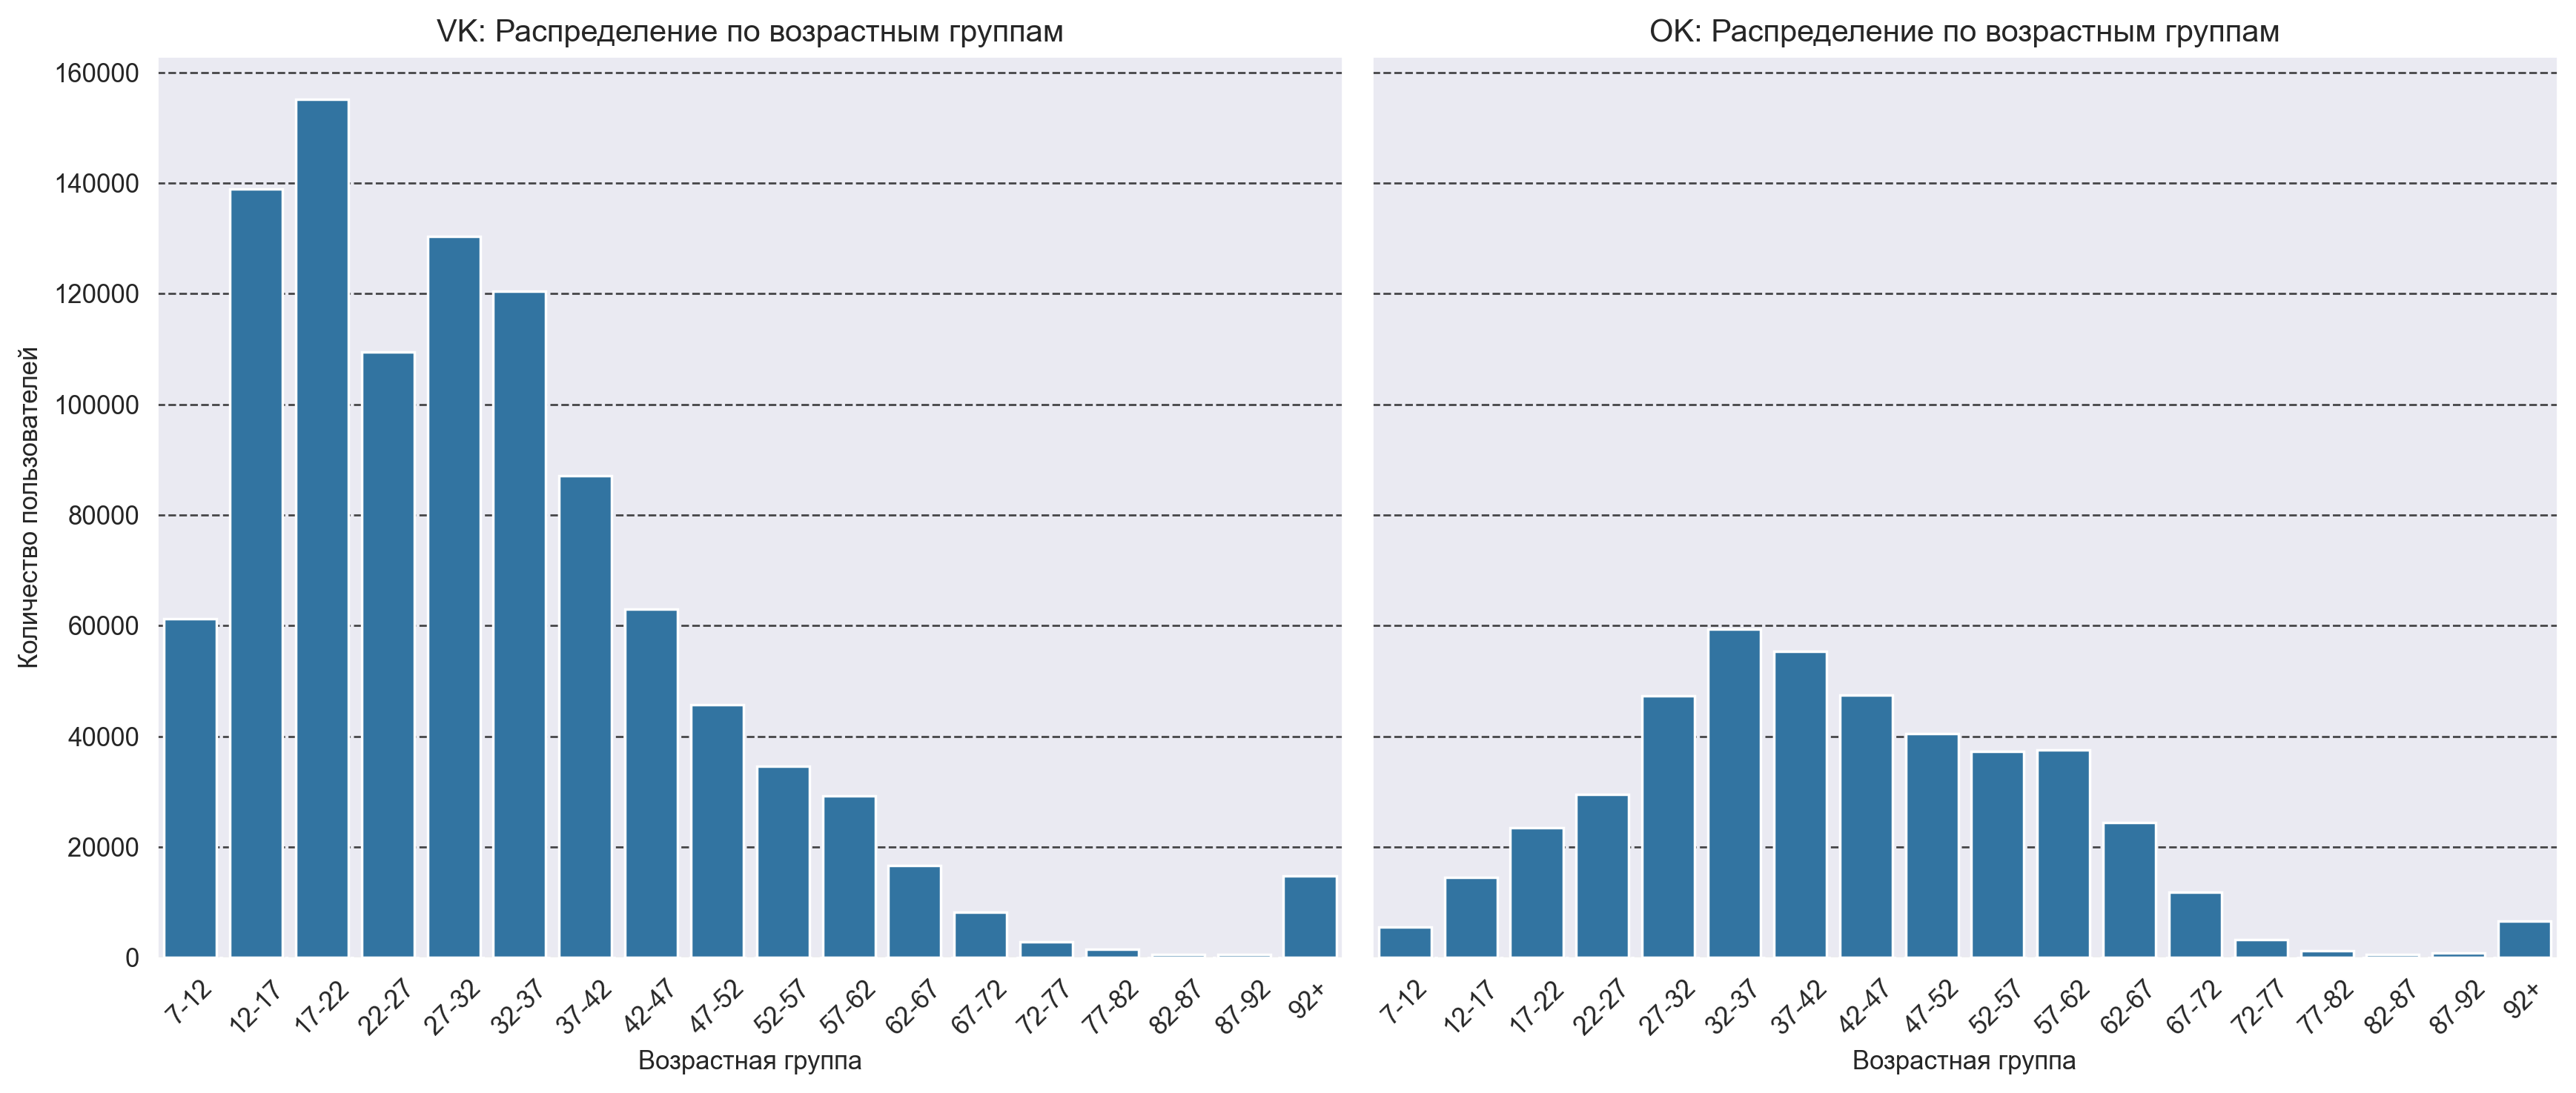

In [12]:
# Создаем фигуру с двумя подграфиками
fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

# VK
sns.countplot(data=df_vk, x='age_group', order=labels, ax=axes[0], zorder=2)
axes[0].grid(axis='y', linestyle='--', alpha=0.7, zorder=1)
axes[0].set_xlabel('Возрастная группа')
axes[0].set_ylabel('Количество пользователей')
axes[0].set_title('VK: Распределение по возрастным группам')
axes[0].tick_params(axis='x', rotation=45)

# OK
sns.countplot(data=df_ok, x='age_group', order=labels, ax=axes[1], zorder=2)
axes[1].grid(axis='y', linestyle='--', alpha=0.7, zorder=1)
axes[1].set_xlabel('Возрастная группа')
axes[1].set_title('OK: Распределение по возрастным группам')
axes[1].tick_params(axis='x', rotation=45)

# Настраиваем расположение графиков
plt.tight_layout()
plt.show()

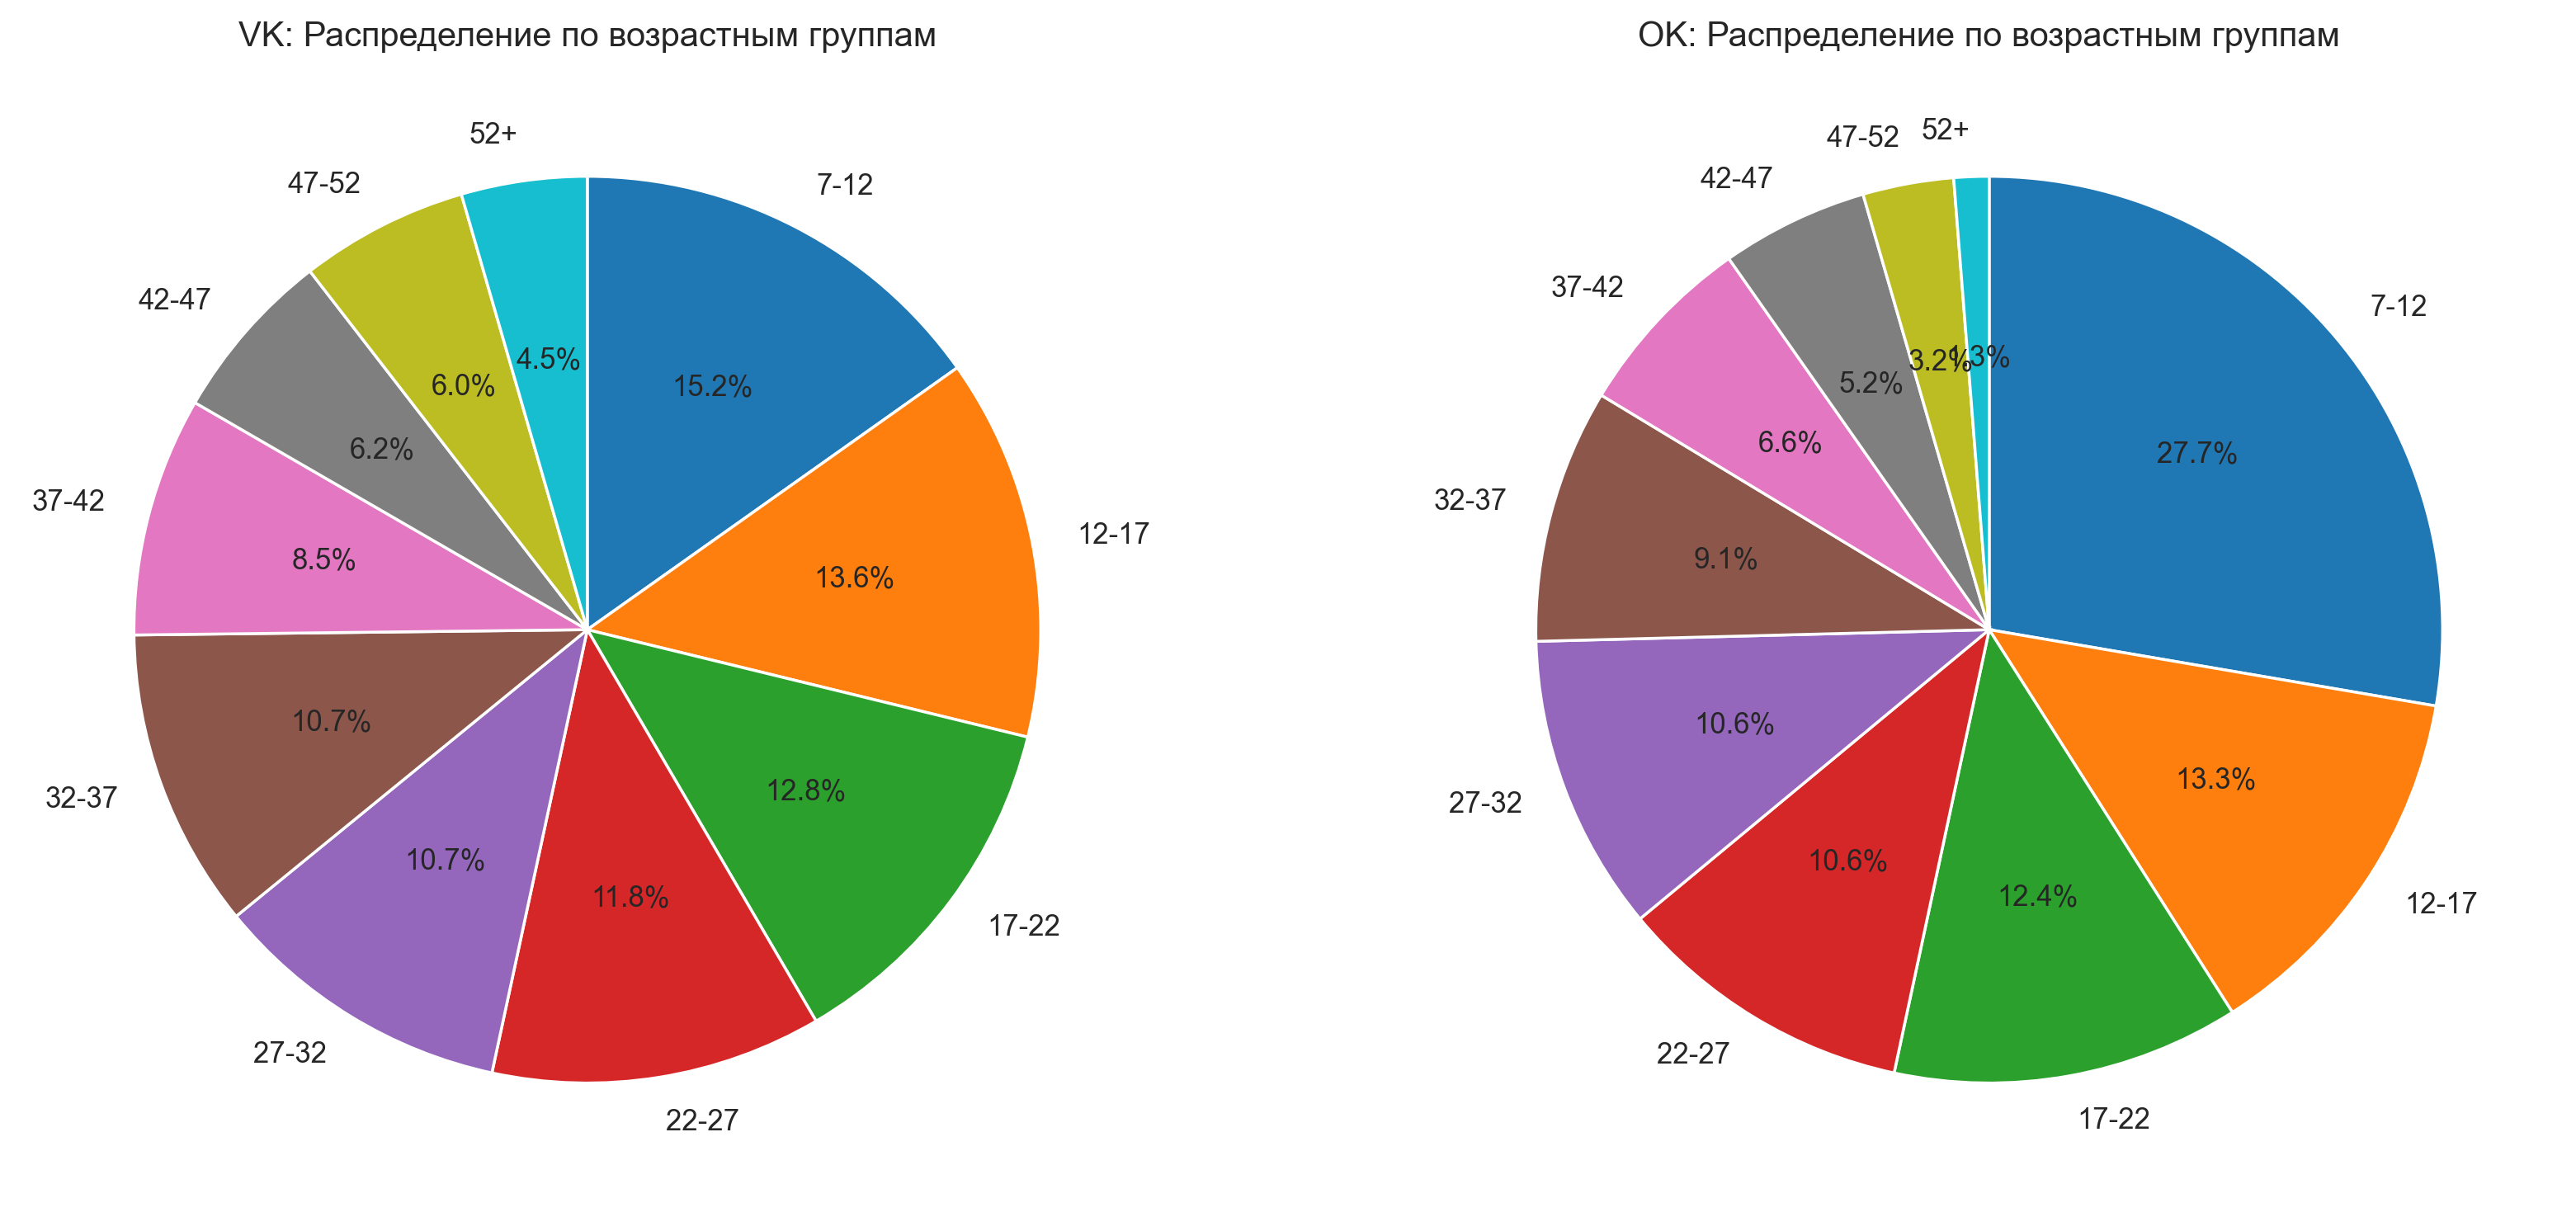

In [13]:
# Разбиваем по другому
plot_bins   = list(range(7, 52+1, 5)) + [120]
plot_labels = [f"{start}-{start+5}" for start in plot_bins[:-2]] + ['52+']

tmp_vk = df_vk.copy()
tmp_ok = df_ok.copy()

tmp_vk['age_group'] = pd.cut(tmp_vk['age'], bins=plot_bins, labels=plot_labels, right=False)
tmp_ok['age_group'] = pd.cut(tmp_ok['age'], bins=plot_bins, labels=plot_labels, right=False)

# Создаем фигуру с двумя подграфиками
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# VK
counts_vk = tmp_vk['age_group'].value_counts()
axes[0].pie(
    counts_vk, 
    labels=plot_labels, 
    autopct='%1.1f%%', 
    startangle=90, 
    counterclock=False
)
axes[0].set_title('VK: Распределение по возрастным группам')

# OK
counts_ok = tmp_ok['age_group'].value_counts()
axes[1].pie(
    counts_ok, 
    labels=plot_labels, 
    autopct='%1.1f%%', 
    startangle=90, 
    counterclock=False
)
axes[1].set_title('OK: Распределение по возрастным группам')

# Настраиваем расположение графиков
plt.tight_layout()
plt.show()

del tmp_vk, tmp_ok

VK:
* Основная аудитория сосредоточена в диапазоне 7-32 лет (64.1%). 
* Наибольшая доля приходится на возрастные группы 7-12 лет (15.2%), 12-17 лет (13.6%), 17-22 лет (12.8%) и 32-37 лет (10.7%).
* Пользователи старше 42 лет составляют только 16.7% аудитории.

OK:
* Основная аудитория сосредоточена в диапазоне 7-37 лет (83.7%)
* Основная аудитория более молодая, чем у ВК.

Количество геймеров по возрастным группам. Геймеры в данном контексте - пользователи, попробовавшие HTML-5 игры хотя бы раз.

In [34]:
# Добавляем колонку с флагом геймера 
df_vk['is_gamer'] = df_vk['days_in_games'] > 0
df_ok['is_gamer'] = df_ok['days_in_games'] > 0

# VK
gamer_counts_vk = df_vk[df_vk['is_gamer']].groupby('age_group', observed=False)['is_gamer'].count()

# OK
gamer_counts_ok = df_ok[df_ok['is_gamer']].groupby('age_group', observed=False)['is_gamer'].count()

# Выводим результаты
print("Количество геймеров по возрастным группам в VK:")
print(gamer_counts_vk)
print(f"Всего геймеров в ВК: {sum(gamer_counts_vk)}")

print("\nКоличество геймеров по возрастным группам в OK:")
print(gamer_counts_ok)
print(f"Всего геймеров в OК: {sum(gamer_counts_ok)}")

Количество геймеров по возрастным группам в VK:
age_group
7-12     3427
12-17    8989
17-22    9439
22-27    6348
27-32    6828
32-37    5827
37-42    4193
42-47    3008
47-52    2228
52-57    1751
57-62    1519
62-67     931
67-72     470
72-77     210
77-82      98
82-87      39
87-92      31
92+       915
Name: is_gamer, dtype: int64
Всего геймеров в ВК: 56251

Количество геймеров по возрастным группам в OK:
age_group
7-12      346
12-17    1099
17-22    1711
22-27    1909
27-32    3435
32-37    4998
37-42    5881
42-47    5820
47-52    5944
52-57    6023
57-62    6837
62-67    4819
67-72    2386
72-77     670
77-82     191
82-87     115
87-92     119
92+       932
Name: is_gamer, dtype: int64
Всего геймеров в OК: 53235


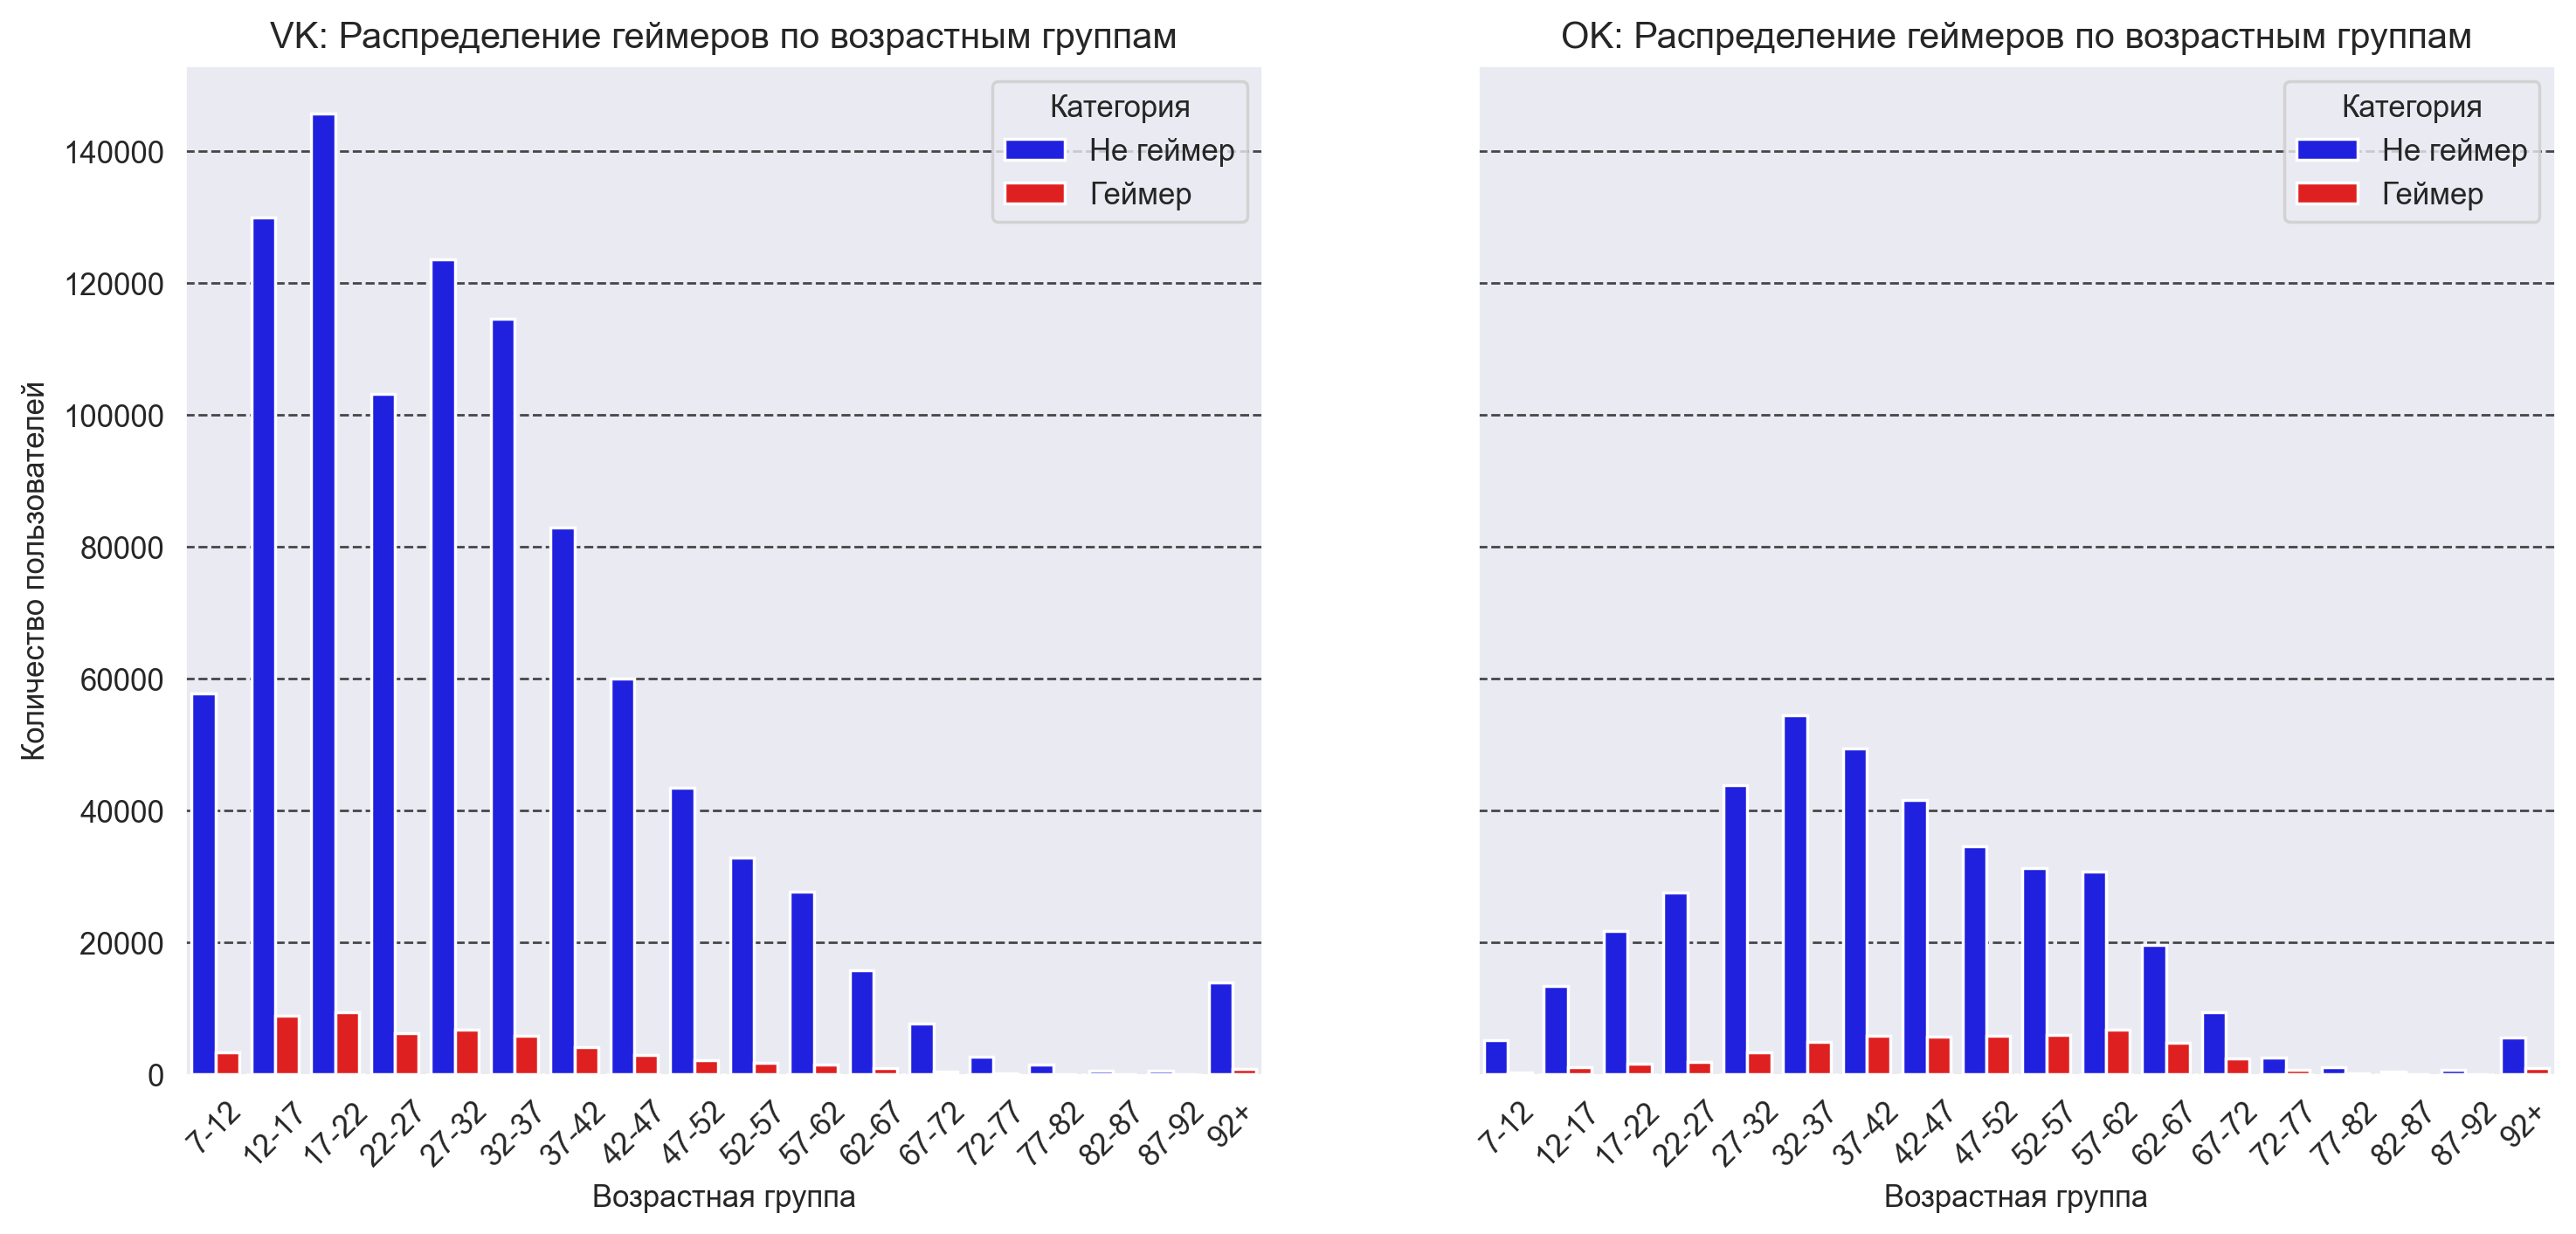

In [ ]:
# Создаем фигуру с двумя подграфиками
fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

# Строим график
sns.countplot(data=df_vk, x='age_group', hue='is_gamer', ax=axes[0], palette={False: 'blue', True: 'red'})
axes[0].grid(axis='y', linestyle='--', alpha=0.7)
axes[0].set_xlabel('Возрастная группа')
axes[0].set_ylabel('Количество пользователей')
axes[0].set_title('VK: Распределение геймеров по возрастным группам')
axes[0].tick_params(axis='x', rotation=45)
axes[0].legend(title='Категория', labels=['Не геймер', 'Геймер'])

sns.countplot(data=df_ok, x='age_group', hue='is_gamer', ax=axes[1], palette={False: 'blue', True: 'red'})
axes[1].grid(axis='y', linestyle='--', alpha=0.7)
axes[1].set_xlabel('Возрастная группа')
axes[1].set_ylabel('Количество пользователей')
axes[1].set_title('OK: Распределение геймеров по возрастным группам')
axes[1].tick_params(axis='x', rotation=45)
axes[1].legend(title='Категория', labels=['Не геймер', 'Геймер'])

plt.show()

* В ВК большая часть попробовавших игры - молодежь, в то время как в ОК - взрослые и пожилые

ВК: 
* Основной возраст геймеров — 12-37 лет, где сосредоточено более 65% всех геймеров.
* После 27 лет число геймеров постепенно падает, и в возрасте старше 47 лет не превышает 2.5 тыс. человек
* Пиковые группы:
    * 17-22 лет: 9 439 геймеров.
    * 12-17 лет: 8 989 геймеров.
    * 27-32 лет: 6 828 геймеров.
* Примечательно, что группа 92+ имеет 915 геймеров — скорее всего, фейковые даты рождения.

OK:
* Возрастной диапазон геймеров смещён на старшие группы:
    * Максимум геймеров (6000-7000 человек) наблюдается в группах 52–57 и 57–62.
* Доля геймеров растёт с возрастом
* Молодёжь (7-22 лет) составляет относительно небольшую долю.
* Также множество пользователей с фейковыми датами рождений.

Рекомендации:
* Для VK стоит сосредоточиться на играх и контенте, ориентированном на молодёжь и подростков (12-22 года).
* Для OK эффективны будут HTML5-игры, ориентированные на пользователей 50+, возможно с более спокойным игровым процессом.

# Платформы

Проверка нулевых значений

In [16]:
print(f"Null значения платформ в ВК - {df_vk['vk_platforms_array'].isnull().sum()}")
print(f"Null значения платформ в ОК - {df_ok['ok_platforms_array'].isnull().sum()}")

Null значения платформ в ВК - 0
Null значения платформ в ОК - 0


Уникальные значения

In [17]:
print(f"Уникальные наборы платформ VK - {df_vk['vk_platforms_array'].unique()}")
print(f"Уникальные наборы платформ OK - {df_ok['ok_platforms_array'].unique()}")

Уникальные наборы платформ VK - ["['web2', 'android', 'mvk', 'android_messenger', 'android_tv']"
 "['android']" "['web2', 'android']" ...
 "['iphone', 'ipad_v2', 'android', 'vk_video_ios', 'smart_tv', 'mvk']"
 "['iphone', 'ipad_v2', 'web2', 'android', 'vk_video_ios', 'mvk', 'vk_video_android', 'android_tv']"
 "['dating_android_client', 'android_clips', 'android', 'vk_video_android']"]
Уникальные наборы платформ OK - ['[APP_IOS]' '[APP_ANDROID]' '[APP_ANDROID, MOBILE_WEB]' '[MOBILE_WEB]'
 '[DESKTOP_WEB]' '[APP_ANDROID, DESKTOP_WEB, MOBILE_WEB]'
 '[APP_IOS, DESKTOP_WEB]' '[APP_ANDROID, DESKTOP_WEB]'
 '[DESKTOP_WEB, MOBILE_WEB]' '[APP_IOS, MOBILE_WEB]'
 '[APP_ANDROID, APP_IOS, MOBILE_WEB]' '[APP_ANDROID, APP_IOS]'
 '[APP_ANDROID, APP_IOS, DESKTOP_WEB]'
 '[APP_IOS, DESKTOP_WEB, MOBILE_WEB]'
 '[APP_ANDROID, APP_IOS, DESKTOP_WEB, MOBILE_WEB]'
 '[MOBILE_WEB, APP_ANDROID]']


Преобразуем в массивы

In [18]:
df_vk['vk_platforms_array'] = df_vk['vk_platforms_array'].apply(ast.literal_eval)
df_ok['ok_platforms_array'] = df_ok['ok_platforms_array'].apply(lambda s: [fr"{x}" for x in re.findall(r'\b([A-Z_]+)\b', s)])

Визуализируем

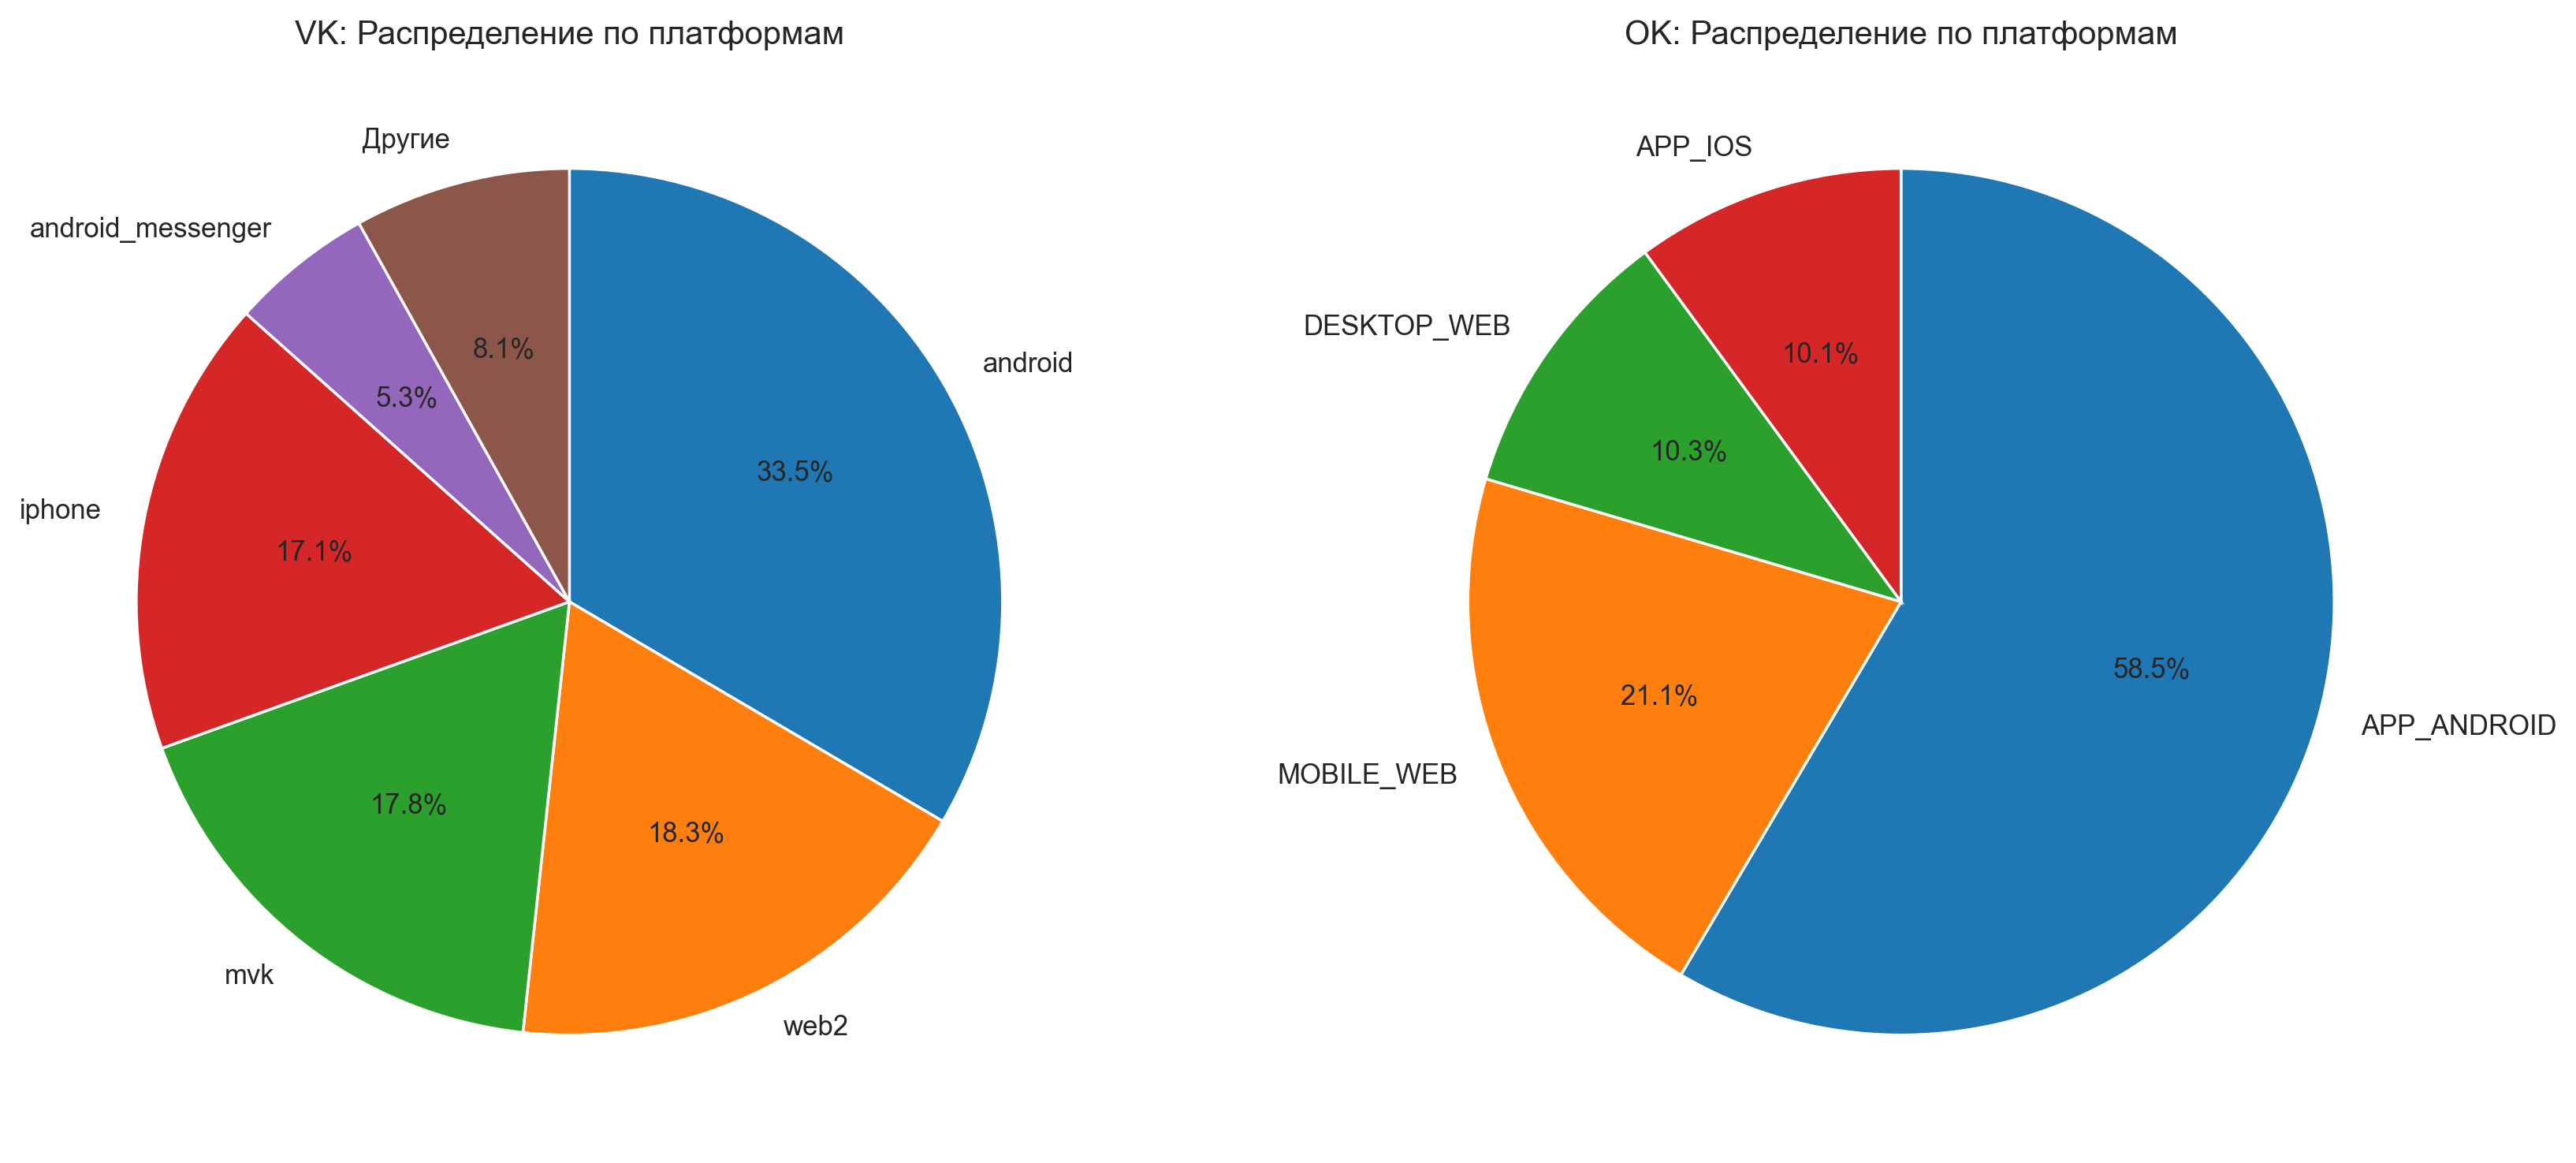

In [19]:
# Создаем фигуру с двумя подграфиками
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Считаем платформы для ВК
vk_platform_counts = (
    df_vk['vk_platforms_array']
    .explode()  # Разбиваем массивы на отдельные строки
    .value_counts()  # Считаем частоту каждой платформы
)

# Выделяем топ-5 по популярности
top_5 = vk_platform_counts.head(5)
others = pd.Series([vk_platform_counts[5:].sum()], index=['Другие'])

vk_platform_counts = pd.concat([top_5, others])

# График для ВК
axes[0].pie(
    vk_platform_counts, 
    labels=vk_platform_counts.index, 
    autopct='%1.1f%%', 
    startangle=90, 
    counterclock=False
)
axes[0].set_title('VK: Распределение по платформам')

# Считаем платформы для ОК
ok_platform_counts = (
    df_ok['ok_platforms_array']
    .explode()  # Разбиваем массивы на отдельные строки
    .value_counts()  # Считаем частоту каждой платформы
    .head(10) # Только первые 10 
)

axes[1].pie(
    ok_platform_counts, 
    labels=ok_platform_counts.index, 
    autopct='%1.1f%%', 
    startangle=90, 
    counterclock=False
)
axes[1].set_title('OK: Распределение по платформам')

# Настраиваем расположение графиков
plt.tight_layout()
plt.show()

*  Ключевая платформа - Android

VK:
* Довольно фрагментированная экосистема с преобладающим Adroid

OK:
* Подавляющее большинство юзеров используют Android

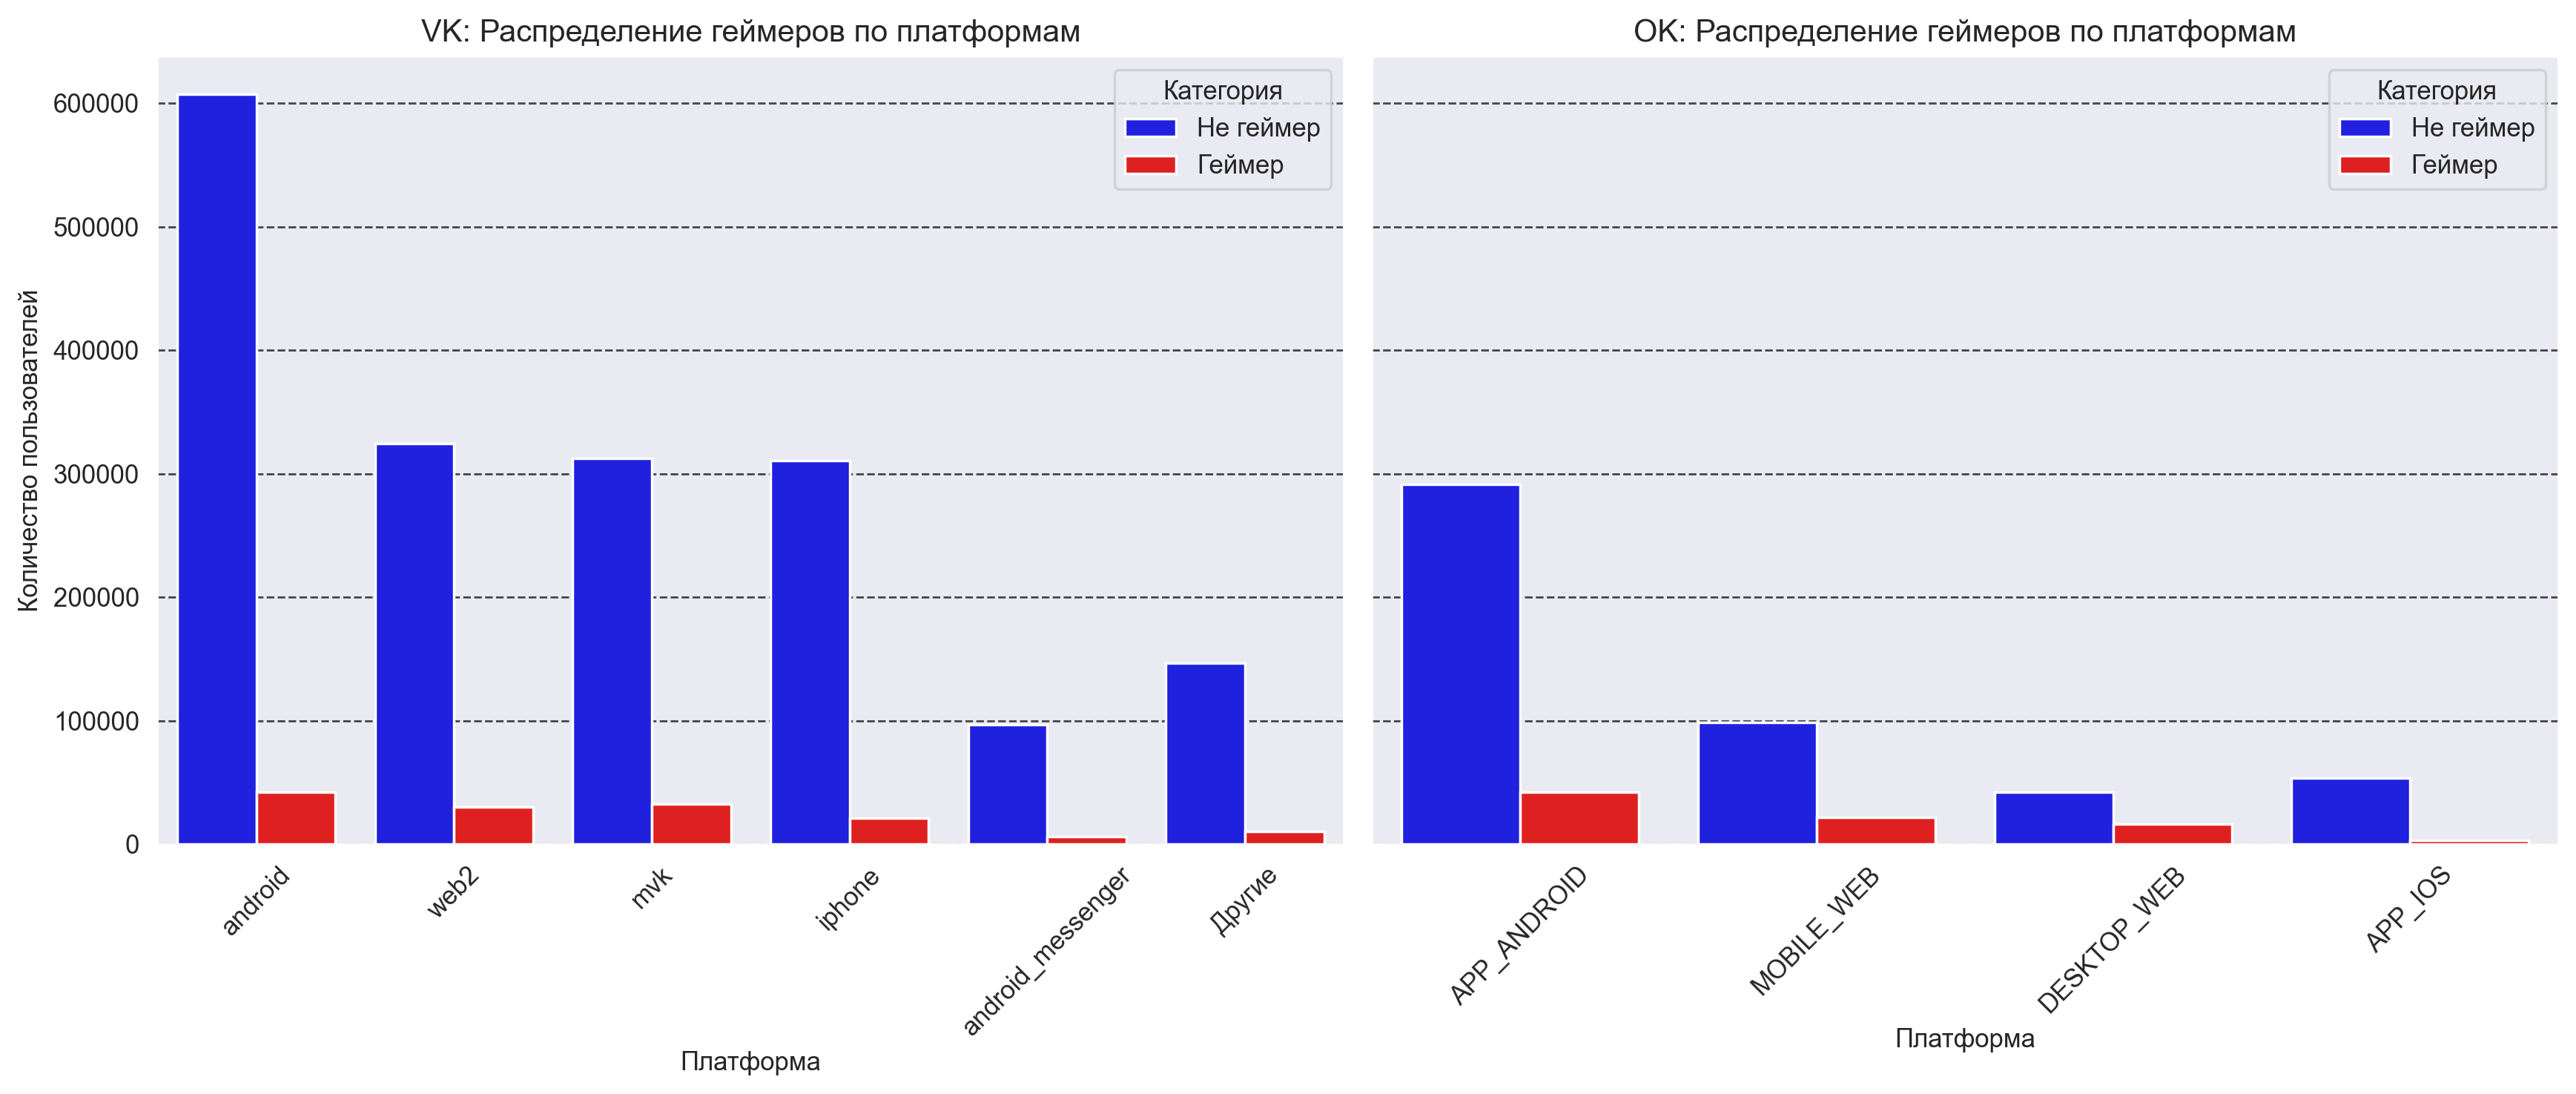

In [20]:
# Массивы платформ в строки
df_vk_exp = df_vk.explode('vk_platforms_array').rename(columns={'vk_platforms_array': 'platform'})
df_ok_exp = df_ok.explode('ok_platforms_array').rename(columns={'ok_platforms_array': 'platform'})

# Считаем частоту платформ в ВК и определяем топ-5
vk_counts = df_vk_exp['platform'].value_counts()
top5_vk = vk_counts.nlargest(5).index

# Создаем новую колонку с топ-5 платформ
df_vk_exp['platform_grouped'] = df_vk_exp['platform'].where(df_vk_exp['platform'].isin(top5_vk), other='Другие')

# Порядок категорий
order_vk = list(top5_vk) + ['Другие']
order_ok = df_ok_exp['platform'].value_counts().index 

# Строим графики
fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

# VK
sns.countplot(
    data=df_vk_exp,
    x='platform_grouped',
    hue='is_gamer',
    ax=axes[0],
    palette={False: 'blue', True: 'red'},
    order=order_vk
)
axes[0].grid(axis='y', linestyle='--', alpha=0.7, zorder=1)
axes[0].set_xlabel('Платформа')
axes[0].set_ylabel('Количество пользователей')
axes[0].set_title('VK: Распределение геймеров по платформам')
axes[0].tick_params(axis='x', rotation=45)
axes[0].legend(title='Категория', labels=['Не геймер', 'Геймер'])

# OK
sns.countplot(
    data=df_ok_exp,
    x='platform',
    hue='is_gamer',
    ax=axes[1],
    palette={False: 'blue', True: 'red'},
    order=order_ok
)
axes[1].grid(axis='y', linestyle='--', alpha=0.7, zorder=1)
axes[1].set_xlabel('Платформа')
axes[1].set_ylabel('Количество пользователей')
axes[1].set_title('OK: Распределение геймеров по платформам')
axes[1].tick_params(axis='x', rotation=45)
axes[1].legend(title='Категория', labels=['Не геймер', 'Геймер'])

plt.tight_layout()
plt.show()

* Любимая платформа геймеров - Android. Геймеры не очень любят iOS

# Потребление контента

Проверка на Nan

In [21]:
cols = [
    "avg_daily_ts_feed",
    "avg_daily_ts_clips",
    "avg_daily_ts_video",
    "avg_daily_ts_games"
]

print(f'Для вк: \n{df_vk[cols].isnull().sum()}')
print(f'Для ок: \n{df_ok[cols].isnull().sum()}')

Для вк: 
avg_daily_ts_feed      86647
avg_daily_ts_clips    366993
avg_daily_ts_video    245697
avg_daily_ts_games    964636
dtype: int64
Для ок: 
avg_daily_ts_feed      29849
avg_daily_ts_clips    380566
avg_daily_ts_video    199494
avg_daily_ts_games    394153
dtype: int64


Группировка

In [22]:
# Заполняем NaN
df_vk_clean = df_vk.copy()
df_vk_clean[cols] = df_vk_clean[cols].fillna(0)

df_ok_clean = df_ok.copy()
df_ok_clean[cols] = df_ok_clean[cols].fillna(0)

# Группируем и суммируем
grouped_vk = (
    df_vk_clean
    .groupby('age_group', observed=False)[[
        'avg_daily_ts_feed',
        'avg_daily_ts_clips',
        'avg_daily_ts_video',
        'avg_daily_ts_games'
    ]]
    .sum()
)

grouped_ok = (
    df_ok_clean
    .groupby('age_group', observed=False)[[
        'avg_daily_ts_feed',
        'avg_daily_ts_clips',
        'avg_daily_ts_video',
        'avg_daily_ts_games'
    ]]
    .sum()
)

Какая возрастная категория чаще всего использует игры?

In [23]:
VK_percentages = (grouped_vk['avg_daily_ts_games'] / grouped_vk['avg_daily_ts_games'].sum()) * 100
OK_percentages = (grouped_ok['avg_daily_ts_games'] / grouped_vk['avg_daily_ts_games'].sum()) * 100

print(f'Проценты для VK - \n{VK_percentages}')
print(f'Проценты для OK - \n{OK_percentages}')

Проценты для VK - 
age_group
7-12      2.767611
12-17     8.714347
17-22    10.171487
22-27     8.289220
27-32    10.906700
32-37    11.497234
37-42     9.916680
42-47     8.359235
47-52     7.653349
52-57     7.314995
57-62     6.381918
62-67     3.602696
67-72     1.593813
72-77     0.728289
77-82     0.283988
82-87     0.099815
87-92     0.017127
92+       1.701496
Name: avg_daily_ts_games, dtype: float64
Проценты для OK - 
age_group
7-12      1.209094
12-17     4.243051
17-22     5.401619
22-27     5.829028
27-32    11.395249
32-37    18.734891
37-42    29.165259
42-47    34.022540
47-52    35.330499
52-57    36.749042
57-62    39.726430
62-67    25.563337
67-72    11.454646
72-77     2.411047
77-82     0.620731
82-87     0.410257
87-92     0.654390
92+       5.591722
Name: avg_daily_ts_games, dtype: float64


Text(0.5, 1.0, 'VK: Распределение по среднему времени, проведенному в играх за день')

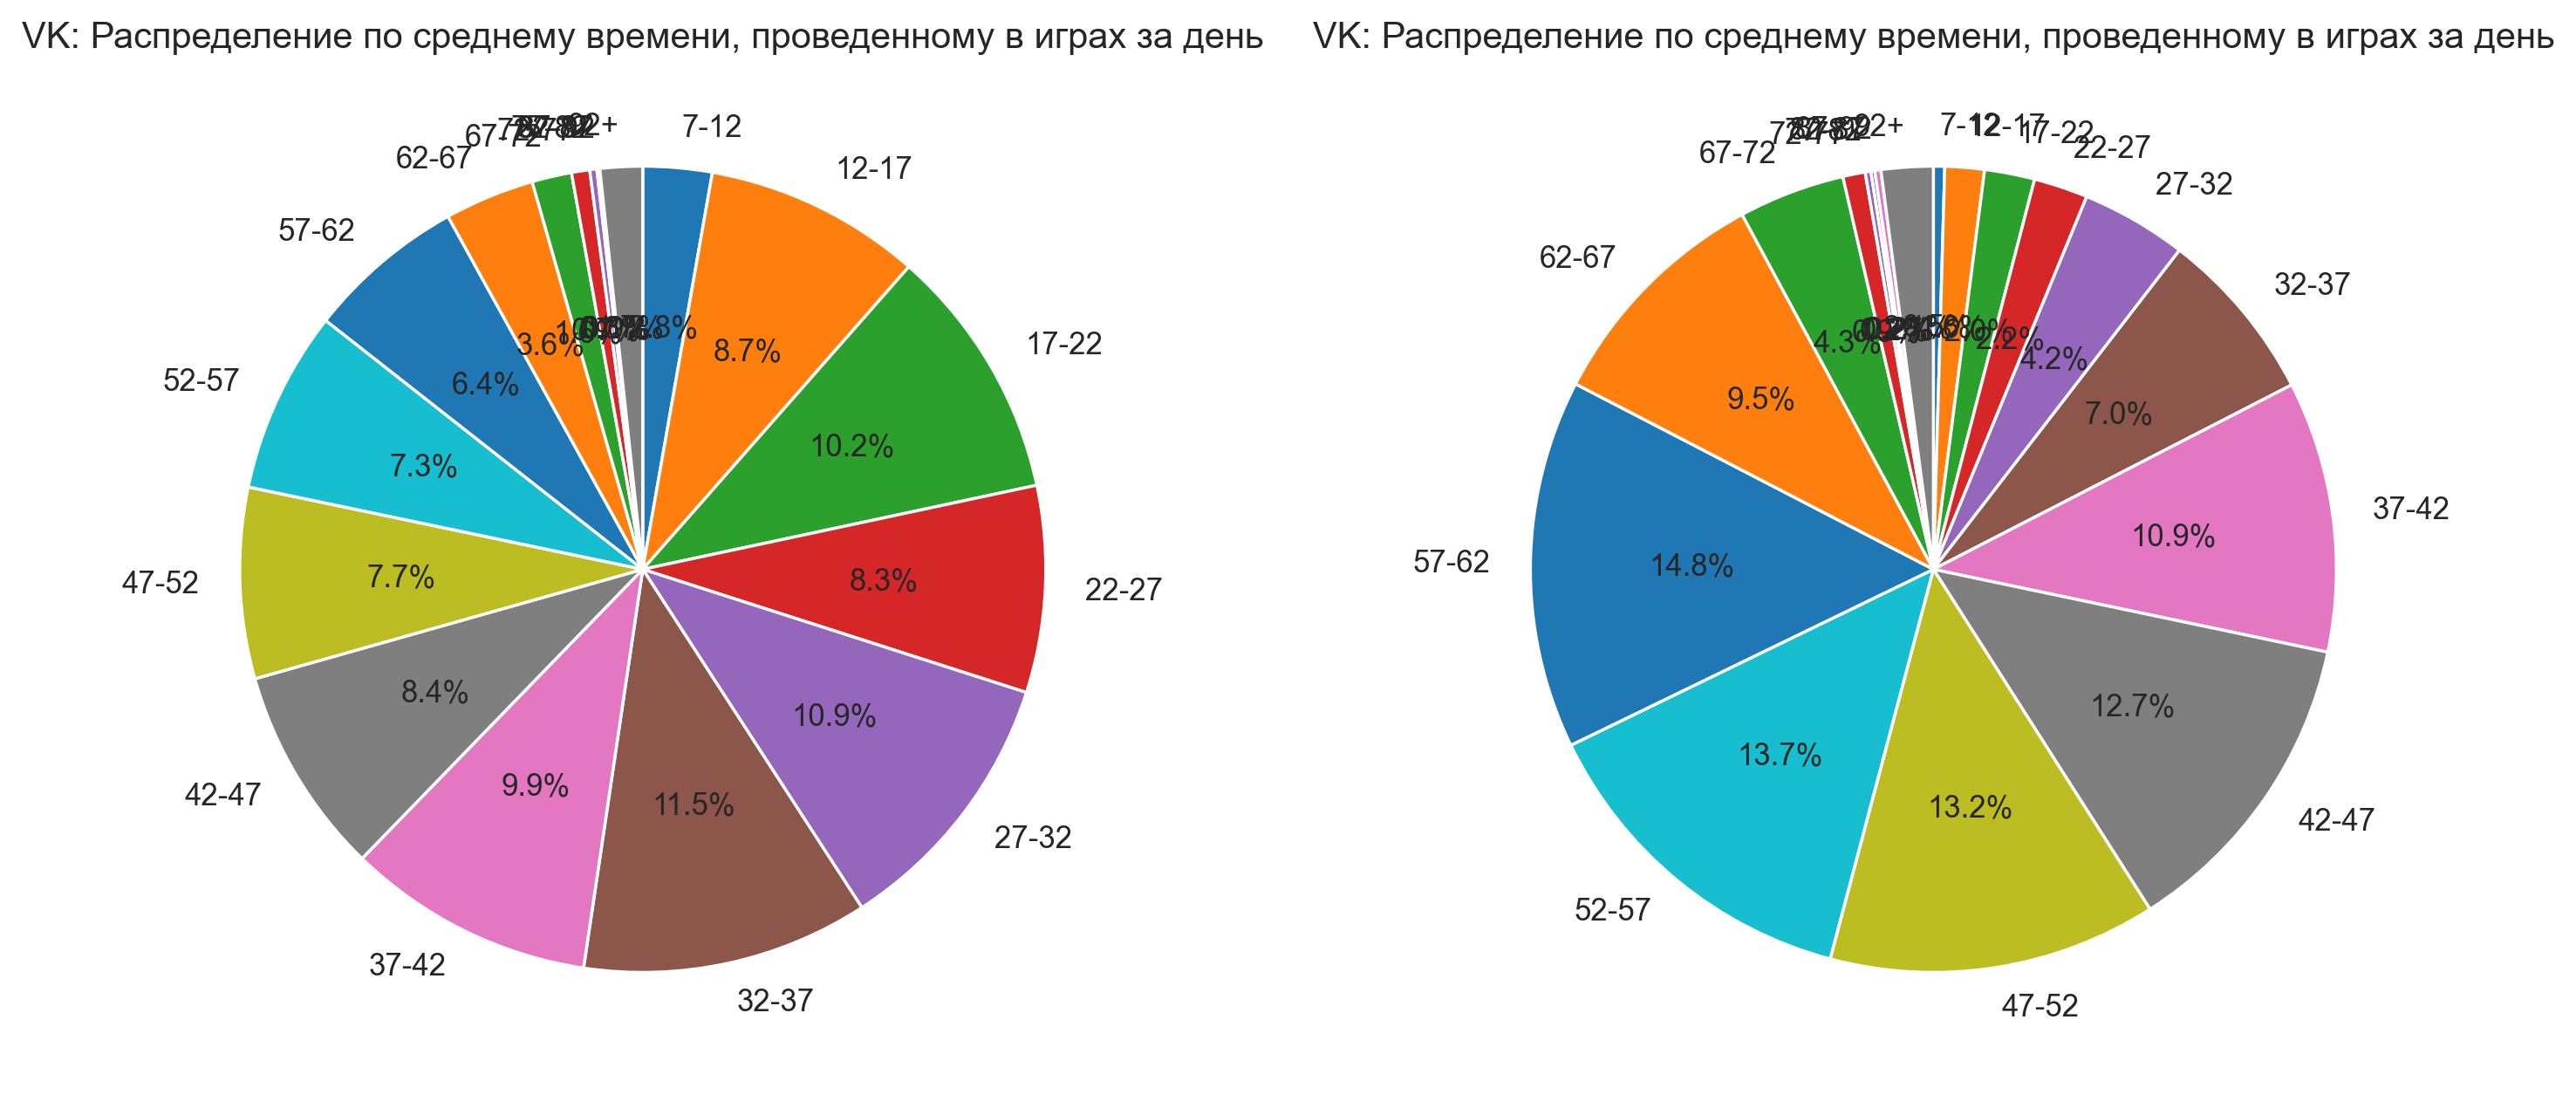

In [24]:
# Создаем фигуру с двумя подграфиками
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# График для ВК
axes[0].pie(
    VK_percentages, 
    labels=grouped_vk.index, 
    autopct='%1.1f%%', 
    startangle=90, 
    counterclock=False
)
axes[0].set_title('VK: Распределение по среднему времени, проведенному в играх за день')

# График для ОК
axes[1].pie(
    OK_percentages, 
    labels=grouped_ok.index, 
    autopct='%1.1f%%', 
    startangle=90, 
    counterclock=False
)
axes[1].set_title('VK: Распределение по среднему времени, проведенному в играх за день')

Нормировка

In [25]:
# Нормируем по строкам
grouped_normalized_vk = grouped_vk.div(grouped_vk.sum(axis=1), axis=0)
grouped_normalized_ok = grouped_ok.div(grouped_ok.sum(axis=1), axis=0)

In [26]:
grouped_normalized_vk

,avg_daily_ts_feed,avg_daily_ts_clips,avg_daily_ts_video,avg_daily_ts_games
age_group,,,,
7-12,0.243982,0.216416,0.512683,0.026918
12-17,0.290103,0.199371,0.483340,0.027186
17-22,0.274666,0.192743,0.508872,0.023718
22-27,0.315485,0.188090,0.475233,0.021192
27-32,0.381550,0.179152,0.417463,0.021836
32-37,0.428716,0.166513,0.380060,0.024711
37-42,0.449564,0.160743,0.358389,0.031305
42-47,0.462208,0.159943,0.338726,0.039122
47-52,0.472883,0.162204,0.312342,0.052571


In [27]:
grouped_normalized_ok

,avg_daily_ts_feed,avg_daily_ts_clips,avg_daily_ts_video,avg_daily_ts_games
age_group,,,,
7-12,0.446991,0.067874,0.210529,0.274606
12-17,0.300654,0.034669,0.364201,0.300476
17-22,0.344371,0.048259,0.393367,0.214003
22-27,0.469454,0.073643,0.270336,0.186568
27-32,0.545944,0.079152,0.166874,0.208030
32-37,0.558440,0.080329,0.133993,0.227238
37-42,0.514681,0.081942,0.100449,0.302928
42-47,0.487887,0.080779,0.085262,0.346073
47-52,0.454387,0.086509,0.107781,0.351323


Строим

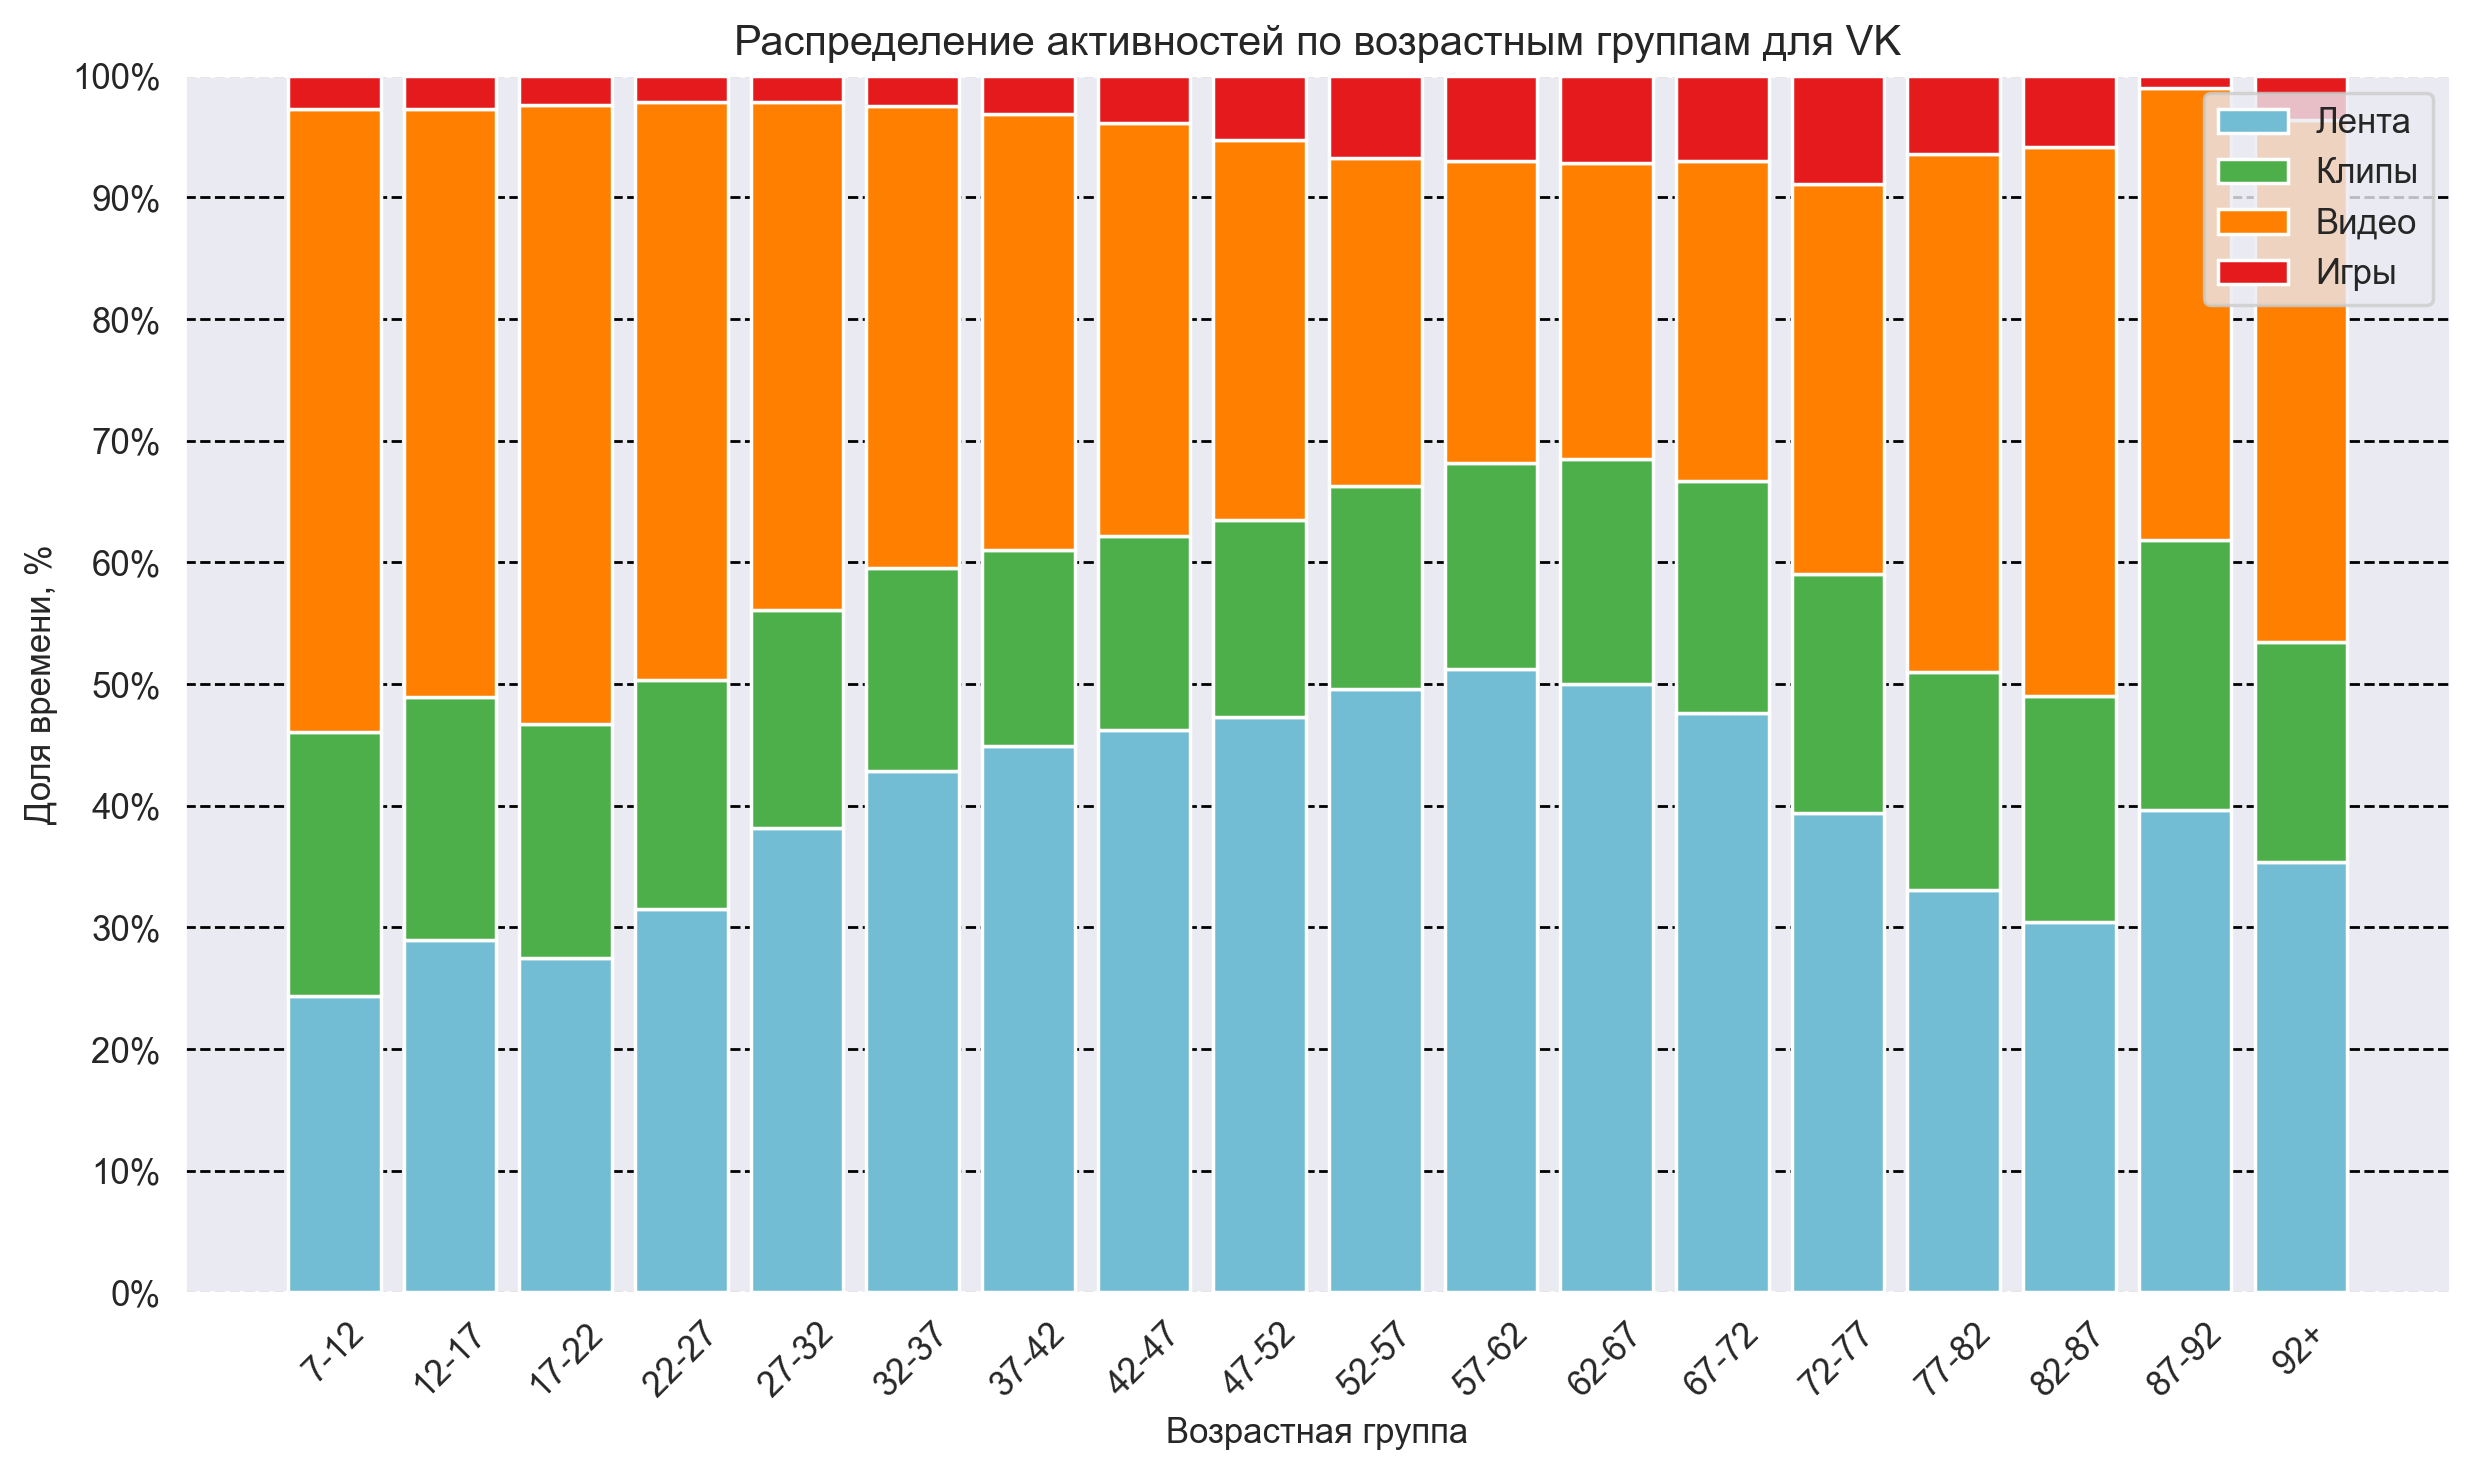

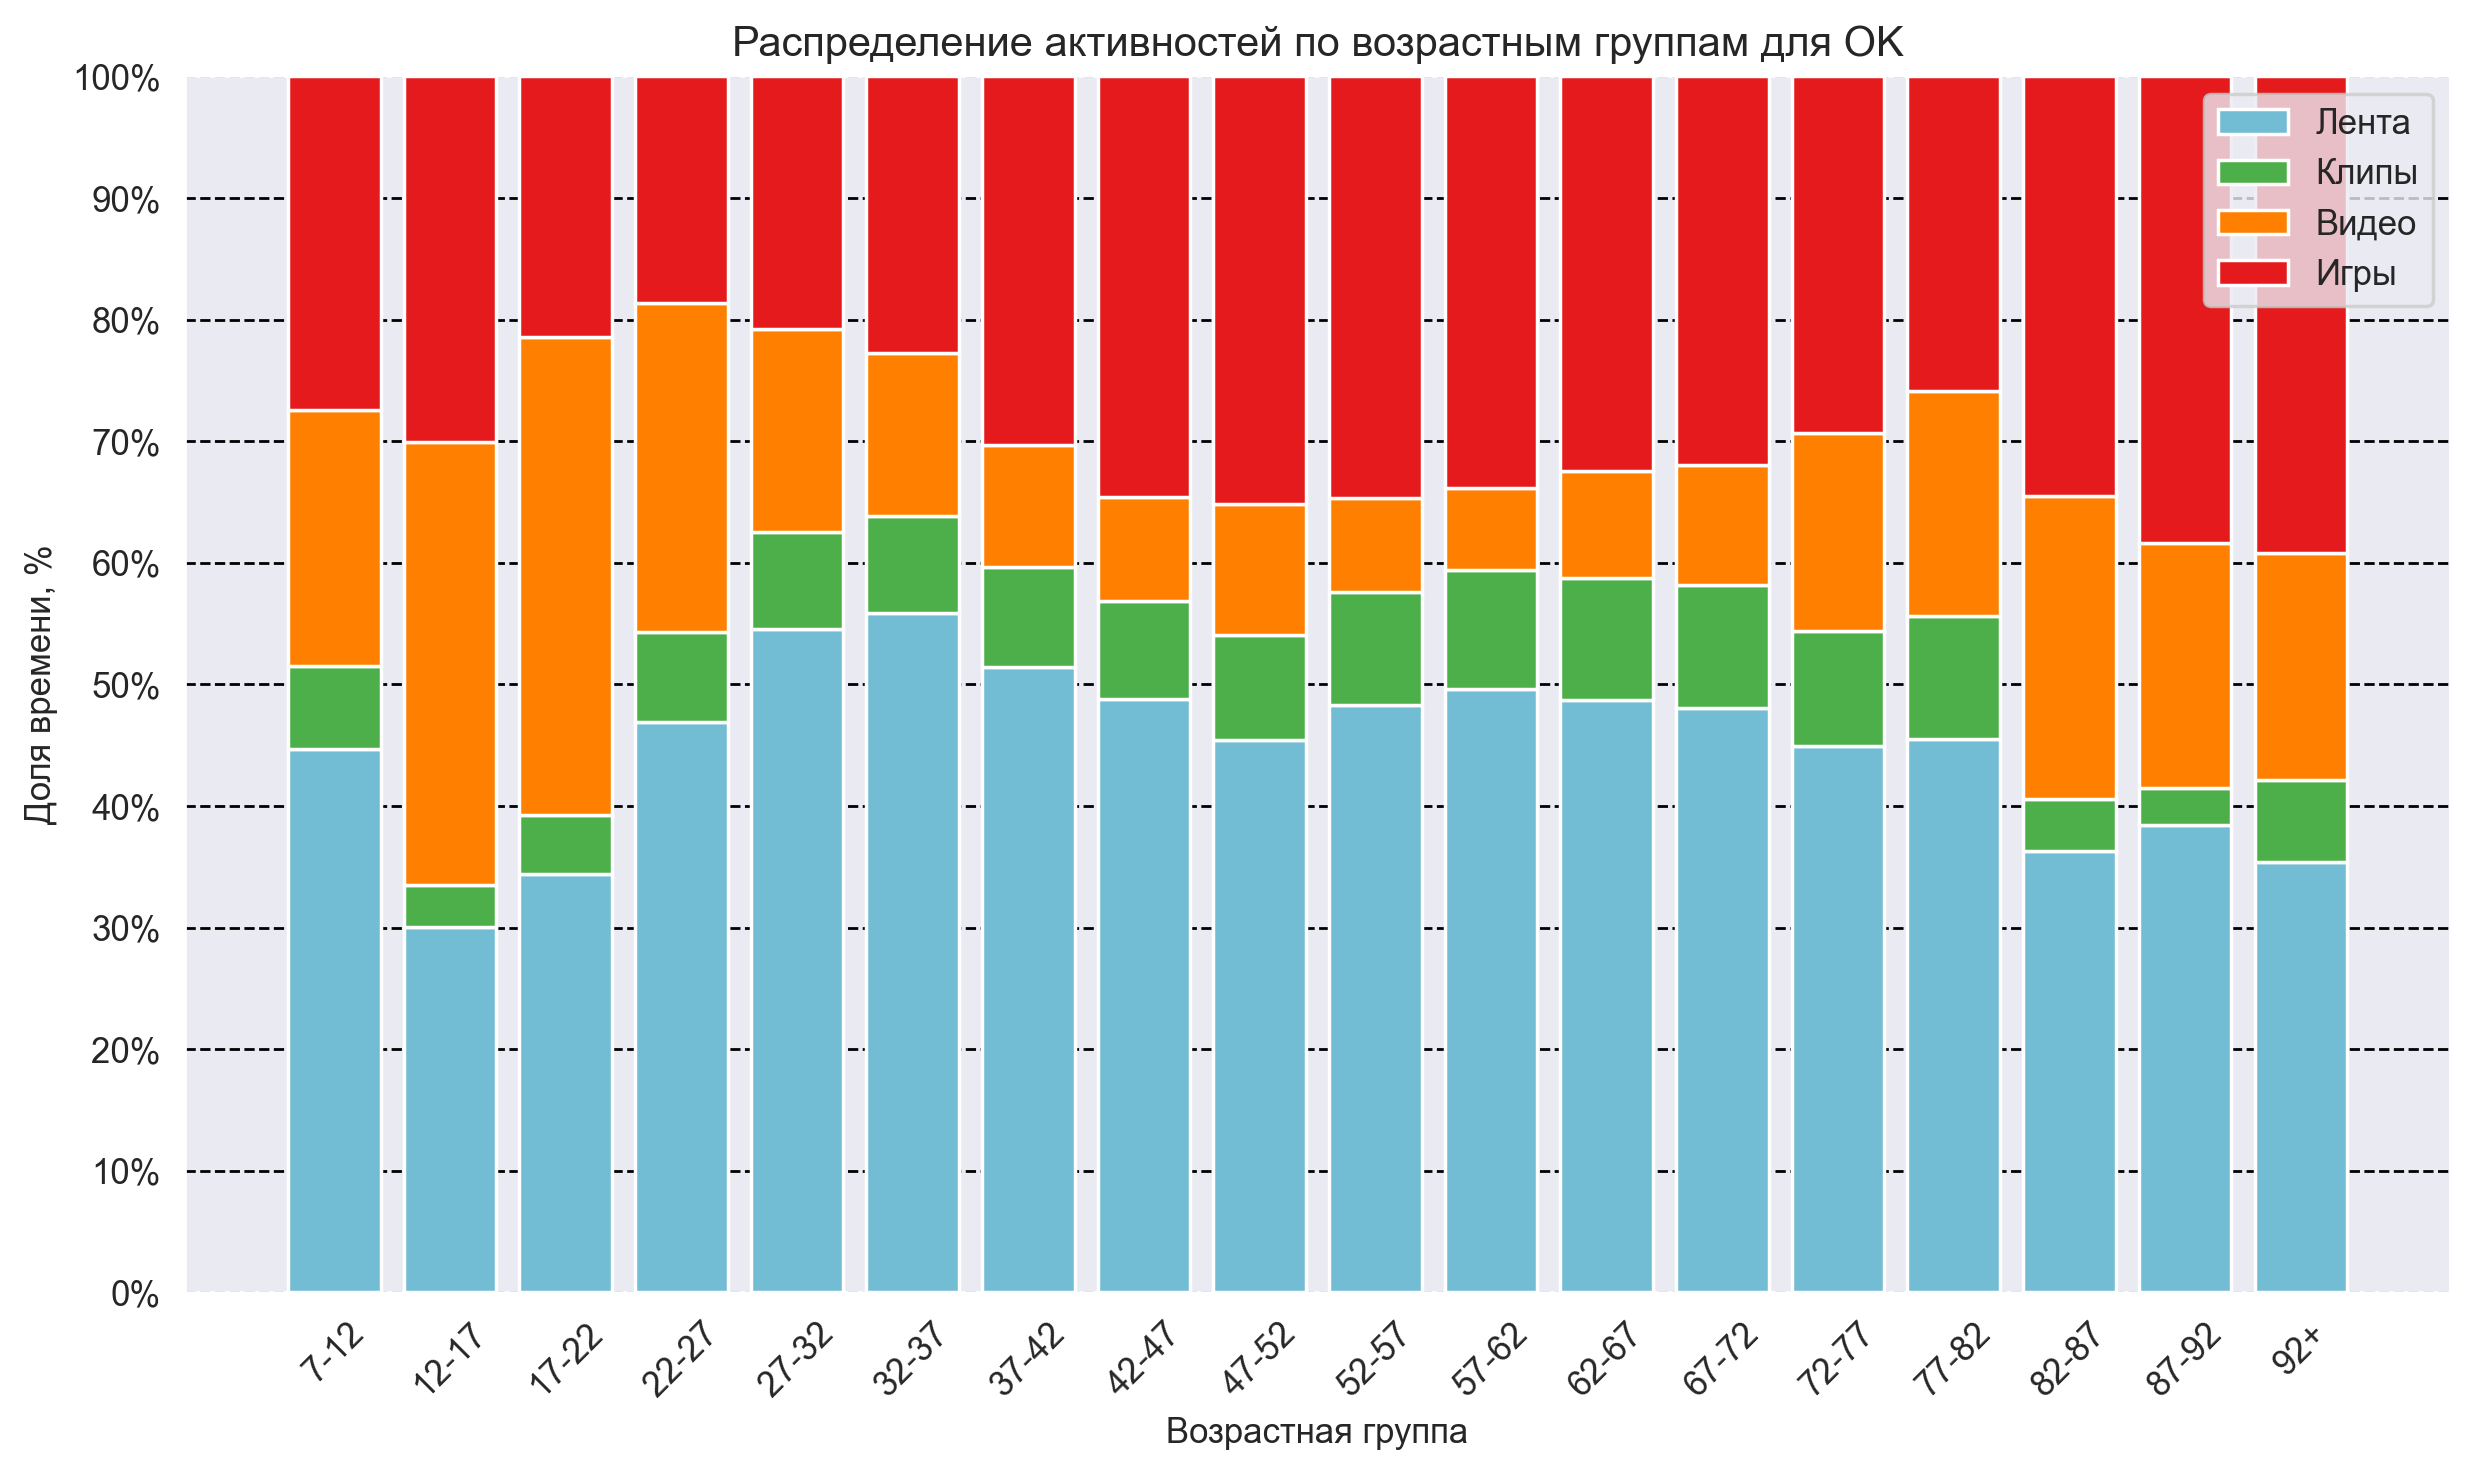

In [28]:
def build_graph(grouped_normalized, colors, name):
    _, ax = plt.subplots(figsize=(10, 6))

    # Для накопления значений (расстояние от низа графика)
    bottom = pd.Series(0, index=grouped_normalized.index)

    for col in ['avg_daily_ts_feed', 'avg_daily_ts_clips', 'avg_daily_ts_video', 'avg_daily_ts_games']:
        ax.bar(
            grouped_normalized.index,            # возрастные метки по оси X
            grouped_normalized[col],             # высота «доли»
            bottom=bottom,                       # сдвиг снизу
            color=colors[col],
            label={
                'avg_daily_ts_feed': 'Лента',
                'avg_daily_ts_clips': 'Клипы',
                'avg_daily_ts_video': 'Видео',
                'avg_daily_ts_games': 'Игры'
            }[col]
        )
        bottom += grouped_normalized[col]  # обновляем низ для следующего слоя

    # Оформление
    ax.set_ylabel('Доля времени, %')
    ax.set_xlabel('Возрастная группа')
    ax.set_title(f'Распределение активностей по возрастным группам для {name}')
    ax.set_ylim(0, 1)
    ax.set_yticks([i/10 for i in range(0, 11)])
    ax.set_yticklabels([f'{int(y*100)}%' for y in ax.get_yticks()])
    ax.legend(loc='upper right')

    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

colors = {
    'avg_daily_ts_feed': '#72bcd4',
    'avg_daily_ts_clips': '#4daf4a',
    'avg_daily_ts_video': '#ff7f00',
    'avg_daily_ts_games': '#e41a1c',
}

build_graph(grouped_normalized_vk, colors, 'VK')
build_graph(grouped_normalized_ok, colors, 'OK')

* Пользователи ОК чаще используют игры
* 